2961 documents - 3 categories
vectorization done in 0.250 s
n_samples: 2961, n_features: 6751
Matrix Sparsity is: 0.007
Number of elements assigned to each cluster: [2418   71  472]
Number of elements assigned to each cluster: [2465   71  425]
Number of elements assigned to each cluster: [2424  466   71]
Number of elements assigned to each cluster: [2140  750   71]
True number of documents in each category according to the class labels:[984 990 987]
Cluster 0: space like know just use thanks does don edu usedCluster 1: people don know like msg just doctor good think diseaseCluster 2: shameful surrender cadre dsl n3jxp chastity skepticism geb intellect pitt

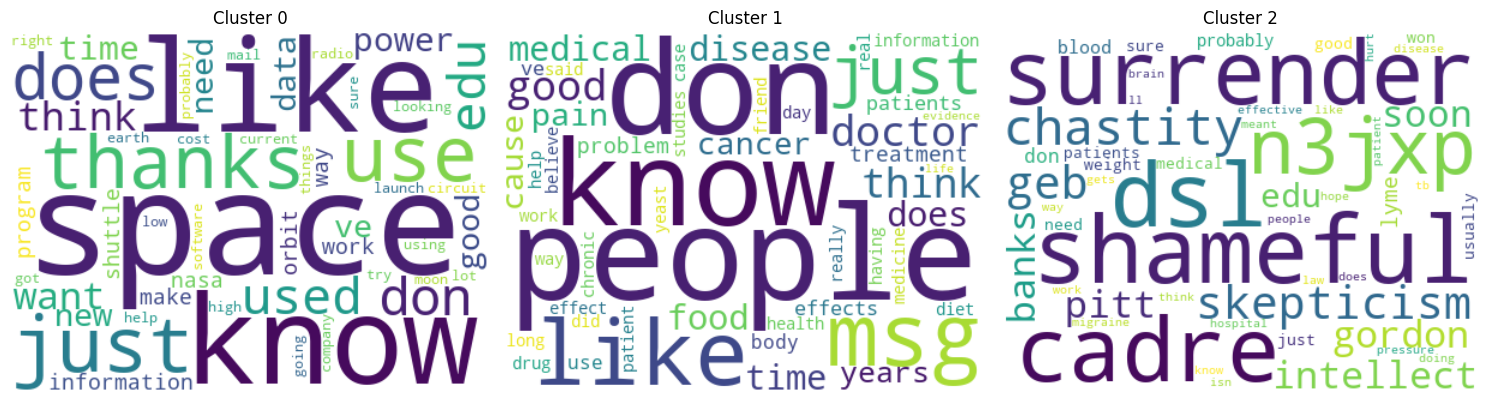

In [25]:
# K-Means for Document Clustering on fetch_20newsgroups
# Import required libraries
import numpy as np  
from sklearn.datasets import fetch_20newsgroups  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.cluster import KMeans  
from wordcloud import WordCloud  
import matplotlib.pyplot as plt  
from time import time  
# Load the 20newsgroups dataset with selected categories -electronics, medicine, and space
categories = ["sci.electronics", "sci.med", "sci.space"]
dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),  # Remove metadata to focus on content
    subset="all",  # Use all data (train + test) for clustering
    categories=categories,shuffle=True,random_state=42,)
# Extract true labels and compute category sizes
labels = dataset.target  # Ground truth labels (0: electronics, 1: med, 2: space)
unique_labels, category_sizes = np.unique(labels, return_counts=True)  # Count documents per category
true_k = unique_labels.shape[0]  # Number of unique categories (3)
print(f"{len(dataset.data)} documents - {true_k} categories")  # Print dataset summary
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5,min_df=5,stop_words="english")
t0 = time()  # Start timing vectorization
X_tfidf = vectorizer.fit_transform(dataset.data)  # Transform text to TF-IDF matrix
print(f"vectorization done in {time() - t0:.3f} s")  # Print time taken
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")  # Print matrix dimensions
print(f"Matrix Sparsity is: {X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")  # Print matrix sparsity
# Perform K-means clustering with multiple random seeds
for seed in range(4):
    kmeans = KMeans(n_clusters=true_k,max_iter=100,n_init=10,random_state=seed).fit(X_tfidf)  
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)  # Count documents per cluster
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")  # Print cluster sizes
print("True number of documents in each category according to the class labels:"f"{category_sizes}")  
#top terms per cluster (Use centroid values (TF-IDF weights) to identify important terms)
centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # Sort indices by centroid values (descending)
terms = vectorizer.get_feature_names_out()  # Get vocabulary terms
for i in range(true_k):
    print("Cluster %d:" % i, end='')  # Print cluster number
    for ind in centroids[i, :10]:  # Print top 10 terms
        print(' %s' % terms[ind], end='')
# Generate word clouds for each cluster, use centroid weights to determine word sizes in the clouds
plt.figure(figsize=(15, 5))  
for i in range(true_k):
    # Create a dictionary of terms and their centroid weights for the word cloud
    term_weights = {terms[ind]: kmeans.cluster_centers_[i, ind] for ind in centroids[i, :50]}  # Top 50 terms
    # Generate word cloud with specified parameters
    wordcloud = WordCloud(width=400, height=300,background_color='white',max_words=50,
                          random_state=42).generate_from_frequencies(term_weights)
    # Plot word cloud in a subplot (1 row, 3 columns)
    plt.subplot(1, true_k, i + 1)  # Select subplot for cluster i
    plt.imshow(wordcloud, interpolation='bilinear')  # Display word cloud
    plt.title(f'Cluster {i}')  # Set title as Cluster 0, 1, or 2
    plt.axis('off')  
plt.tight_layout()  
plt.savefig('kmeans_wordclouds.png')  

2961 documents - 3 categories
Vectorization done in 0.270 s
n_samples: 2961, n_features: 6751
Sparsity: 0.007
LSA done in 0.022 s
Reduced matrix shape: (2961, 3)
Explained variance ratio of 3 components: 0.018
Topic 0: space like don know just think does people use eduTopic 1: geb shameful surrender cadre dsl pitt n3jxp chastity skepticism intellectTopic 2: space nasa shuttle launch orbit moon mission earth satellite program

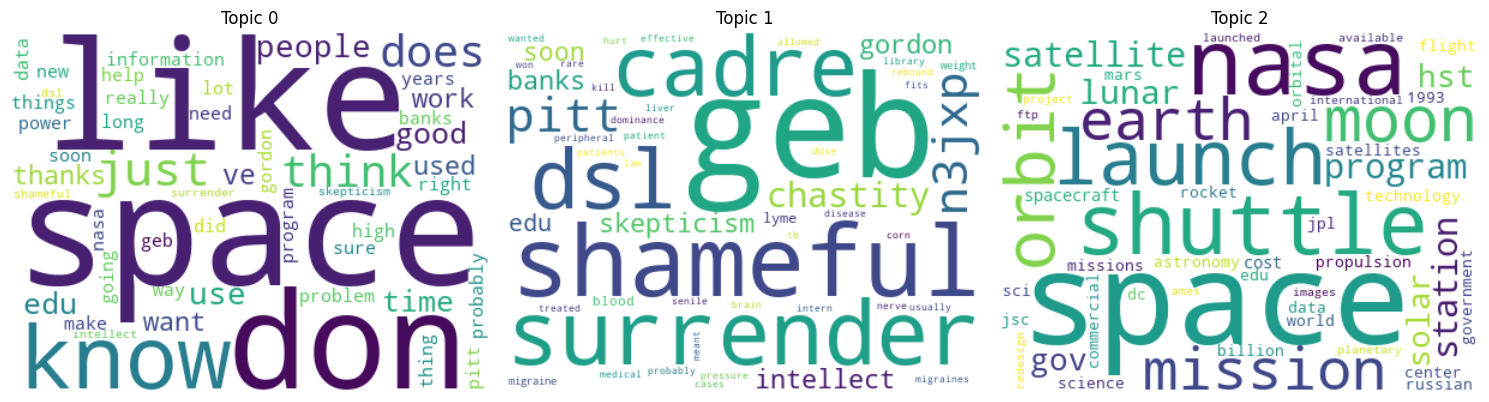

In [27]:
## LSA on Text Dataset
# Import required libraries
import numpy as np  # For numerical operations and array handling
from sklearn.datasets import fetch_20newsgroups  # To load the 20newsgroups dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF vectorization
from sklearn.decomposition import TruncatedSVD  # For LSA via Singular Value Decomposition
from wordcloud import WordCloud  # For generating word cloud visualizations
import matplotlib.pyplot as plt  # For plotting word clouds
from time import time  # To measure processing time
# Load the 20newsgroups dataset with selected categories
categories = ["sci.electronics", "sci.med", "sci.space"]
dataset = fetch_20newsgroups(remove=("headers", "footers", "quotes"),  # Remove metadata to focus on content
    subset="all", categories=categories, shuffle=True, random_state=42,)
# Print dataset summary
print(f"{len(dataset.data)} documents - {len(categories)} categories")
# Vectorize text data using TF-IDF
# TF-IDF converts text to numerical vectors, emphasizing important words
vectorizer = TfidfVectorizer(max_df=0.5,min_df=5,stop_words="english")
t0 = time()  # Start timing vectorization
X_tfidf = vectorizer.fit_transform(dataset.data)  # Transform text to TF-IDF matrix
print(f"Vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")
print(f"Sparsity: {X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")
# Apply Latent Semantic Analysis (LSA) using Truncated SVD
# Reduce the TF-IDF matrix to a lower-dimensional semantic space
n_components = 3  # Number of latent topics (set to number of categories for simplicity)
lsa = TruncatedSVD(n_components=n_components, random_state=42)  # Initialize LSA model
t0 = time()  # Start timing LSA
X_lsa = lsa.fit_transform(X_tfidf)  # Transform TF-IDF matrix to latent space
print(f"LSA done in {time() - t0:.3f} s")
print(f"Reduced matrix shape: {X_lsa.shape}")
# Print explained variance ratio to show how much information is retained
explained_variance = lsa.explained_variance_ratio_.sum()
print(f"Explained variance ratio of {n_components} components: {explained_variance:.3f}")
# Extract and print top terms for each latent topic
# Use LSA components to identify terms with highest weights per topic
terms = vectorizer.get_feature_names_out()  # Get vocabulary terms
components = lsa.components_  # Term-to-topic matrix
for i in range(n_components):
    print(f"Topic {i}:", end='')
    top_term_indices = components[i].argsort()[::-1][:10]#Sort terms by their weights - Top 10 terms
    for idx in top_term_indices:
        print(f" {terms[idx]}", end='')
# Generate word clouds for each latent topic - Use component weights to determine word sizes in the clouds
plt.figure(figsize=(15, 5))  # Create a figure with width 15, height 5
for i in range(n_components):
    # Create a dictionary of terms and their weights for the word cloud
    term_weights = {terms[idx]: components[i, idx] for idx in components[i].argsort()[::-1][:50]}  # Top 50 terms
    wordcloud = WordCloud(width=400,height=300,background_color='white',max_words=50,
                          random_state=42).generate_from_frequencies(term_weights)
    plt.subplot(1, n_components, i + 1)  # Select subplot for topic i
    plt.imshow(wordcloud, interpolation='bilinear')  # Display word cloud
    plt.title(f'Topic {i}')  # Set title as Topic 0, 1, or 2
    plt.axis('off')  # Hide axes for clean visualization
plt.tight_layout()  # Adjust spacing between subplots
#plt.savefig('lsa_wordclouds.png')  # Save figure as PNG

[nltk_data] Downloading package punkt to C:\Users\Nimrita
[nltk_data]     Koul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2961 documents - 3 categories
Word2Vec training complete. Vocabulary size: 8402
Words similar to 'nasa':
  ames: 0.813
  exploration: 0.778
  hubble: 0.760
  agency: 0.757
  flight: 0.755
Words similar to 'doctor':
  wife: 0.824
  she: 0.824
  ent: 0.820
  friend: 0.818
  woman: 0.812
Words similar to 'circuit':
  impedance: 0.883
  signal: 0.867
  output: 0.862
  voltage: 0.858
  device: 0.851
Analogy 'nasa' - 'space' + 'doctor' ≈ asked (similarity: 0.716)


C:\Anaconda3\envs\pytorch_cuda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


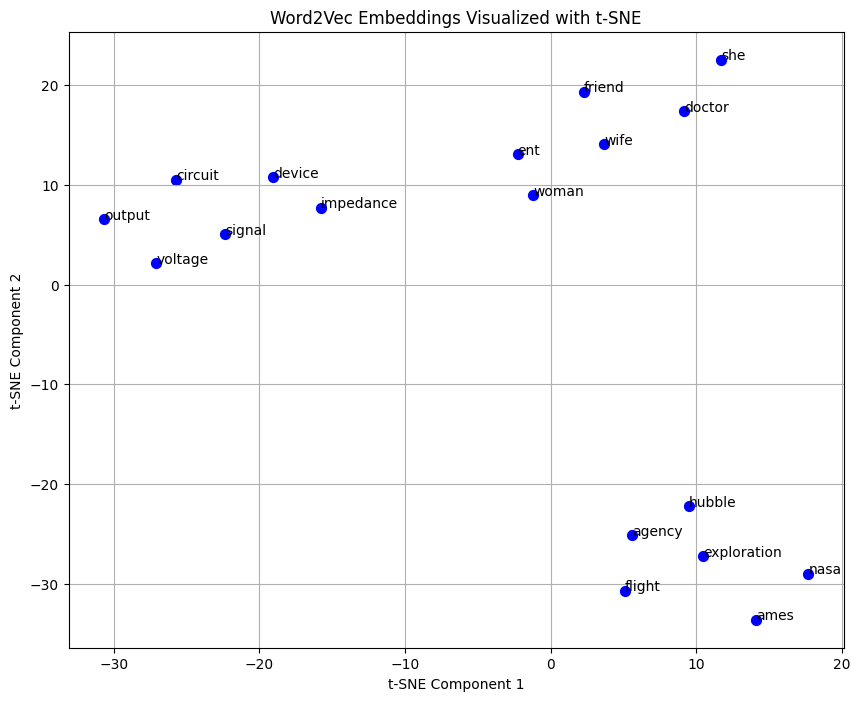

In [30]:
## Word Embeddings from 20 News Groups Dataset using Word2Vec
import numpy as np  # For numerical operations and array handling
from sklearn.datasets import fetch_20newsgroups  # To load the 20newsgroups dataset
from gensim.models import Word2Vec  # For training Word2Vec embeddings
from sklearn.manifold import TSNE  # For 2D visualization of word vectors
import matplotlib.pyplot as plt  # For plotting
from nltk.tokenize import word_tokenize  # For tokenizing text
import nltk  # For NLP utilities
nltk.download('punkt')  # Download tokenizer data
categories = ["sci.electronics", "sci.med", "sci.space"]
dataset = fetch_20newsgroups(remove=("headers", "footers", "quotes"), 
print(f"{len(dataset.data)} documents - {len(categories)} categories")
# Preprocess text: tokenize documents into lists of words:Word2Vec requires tokenized text (lists of words) as input
tokenized_docs = [word_tokenize(doc.lower()) for doc in dataset.data]  # Convert to lowercase and tokenize
# Train Word2Vec model to learn word embeddings, use skip-gram model 
model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5,sg=1,min_count=5,workers=4,seed=42)
print(f"Word2Vec training complete. Vocabulary size: {len(model.wv)}")
#Demonstrate semantic relationships:compute similarities for selected terms relevant to dataset categories
example_words = ["nasa", "doctor", "circuit"]
for word in example_words:
    if word in model.wv:
        print(f"Words similar to '{word}':")
        similar_words = model.wv.most_similar(word, topn=5)  # Get top 5 similar words
        for similar_word, similarity in similar_words:
            print(f"  {similar_word}: {similarity:.3f}")
    else:
        print(f"'{word}' not in vocabulary")
# Demonstrate analogy: king - man + woman ≈ queen, Test an analogy relevant to the dataset (e.g., space-related)
try:
    analogy_result = model.wv.most_similar(positive=["nasa", "doctor"], negative=["space"], topn=1)
    print(f"Analogy 'nasa' - 'space' + 'doctor' ≈ {analogy_result[0][0]} (similarity: {analogy_result[0][1]:.3f})")
except KeyError as e:
    print(f"Analogy not computed: {e} not in vocabulary")
# Visualize word embeddings using t-SNE- Select a subset of words to avoid overcrowding
selected_words = []
for word in example_words:
    if word in model.wv:
        selected_words.append(word)
        # Add top 5 similar words for each example word
        selected_words.extend([w for w, _ in model.wv.most_similar(word, topn=5)])
selected_words = list(set(selected_words))  # Remove duplicates
word_vectors = np.array([model.wv[word] for word in selected_words])  # Get word vectors
# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
word_vectors_2d = tsne.fit_transform(word_vectors)
# Plot word embeddings in 2D
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='blue', s=50)
for i, word in enumerate(selected_words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)
plt.title("Word2Vec Embeddings Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
#plt.savefig("word2vec_tsne.png")  # Save visualization

[nltk_data] Downloading package punkt to C:\Users\Nimrita
[nltk_data]     Koul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2961 documents - 3 categories
FastText training complete. Vocabulary size: 8402
Words similar to 'nasa':
  nasp: 0.912
  nasal: 0.875
  asa: 0.869
  nasa/jsc/gm2: 0.843
  spacelab: 0.827
Words similar to 'doctor':
  friend: 0.873
  girlfriend: 0.869
  friendly: 0.861
  doc: 0.858
  doctors: 0.844
Words similar to 'circuit':
  circuitry: 0.963
  circuits: 0.951
  switch: 0.858
  amplify: 0.855
  filter: 0.853
'microchips' is in vocabulary


C:\Anaconda3\envs\pytorch_cuda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


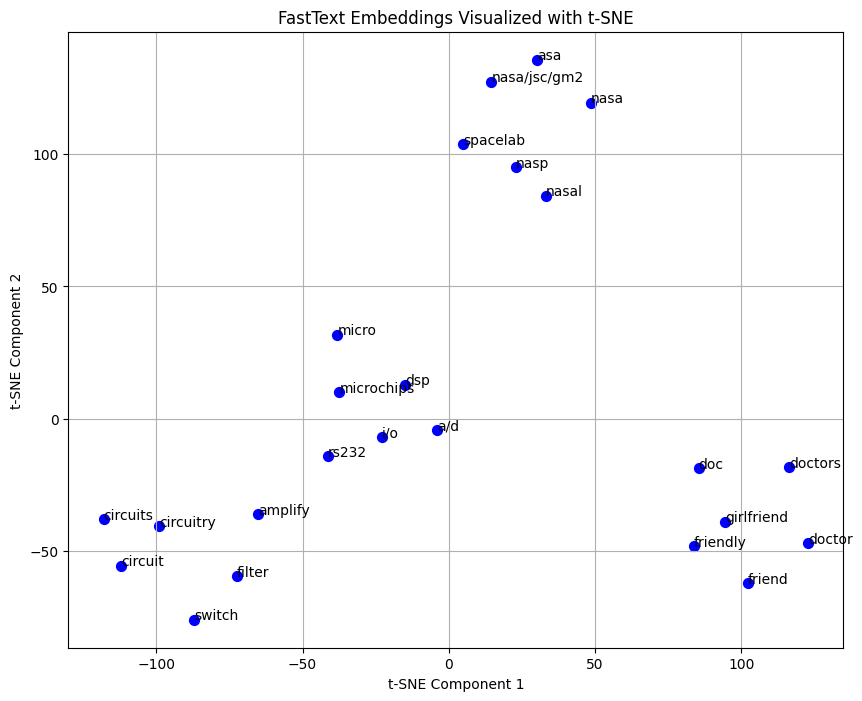

In [31]:
#FastText
# Import required libraries
import numpy as np 
from sklearn.datasets import fetch_20newsgroups  
from gensim.models import FastText  # For training FastText embeddings
from sklearn.manifold import TSNE  # For 2D visualization of word vectors
from nltk.tokenize import word_tokenize  
import matplotlib.pyplot as plt  
import nltk  
nltk.download('punkt')  
categories = ["sci.electronics", "sci.med", "sci.space"]
dataset = fetch_20newsgroups(remove=("headers", "footers", "quotes"),  # Remove metadata to focus on content
    subset="all", categories=categories,shuffle=True, random_state=42,)
print(f"{len(dataset.data)} documents - {len(categories)} categories")
tokenized_docs = [word_tokenize(doc.lower()) for doc in dataset.data]  # Convert to lowercase and tokenize
# Train FastText model to learn word embeddings- Use skip-gram model with subword n-grams
model = FastText(sentences=tokenized_docs, vector_size=100,window=5,sg=1,min_count=5,min_n=3,max_n=6,workers=4,seed=42)
print(f"FastText training complete. Vocabulary size: {len(model.wv)}")
# Demonstrate semantic relationships: compute similarities for selected terms
example_words = ["nasa", "doctor", "circuit"]
for word in example_words:
    if word in model.wv:
        print(f"Words similar to '{word}':")
        similar_words = model.wv.most_similar(word, topn=5)  # Get top 5 similar words
        for similar_word, similarity in similar_words:
            print(f"  {similar_word}: {similarity:.3f}")
    else:
        print(f"'{word}' not in vocabulary")
# Demonstrate handling of out-of-vocabulary (OOV) words
oov_word = "microchips"  # Example word not necessarily in training data
if oov_word in model.wv:
    print(f"'{oov_word}' is in vocabulary")
else:
    print(f"'{oov_word}' not in vocabulary, but embedding generated:")
    similar_words = model.wv.most_similar(oov_word, topn=5)  # Get similar words for OOV
    for similar_word, similarity in similar_words:
        print(f"  {similar_word}: {similarity:.3f}")
# Visualize word embeddings using t-SNE
selected_words = []
for word in example_words + [oov_word]:
    selected_words.append(word)
    if word in model.wv or word == oov_word:
        selected_words.extend([w for w, _ in model.wv.most_similar(word, topn=5)])
selected_words = list(set(selected_words))  # Remove duplicates
word_vectors = np.array([model.wv[word] for word in selected_words])  # Get word vectors
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
word_vectors_2d = tsne.fit_transform(word_vectors)
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='blue', s=50)
for i, word in enumerate(selected_words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)
plt.title("FastText Embeddings Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.savefig("fasttext_tsne.png")  # Save visualization